**Dataset**

https://drive.google.com/drive/folders/1zCOQUv4M8_oL-IVd49XALW3a1PBz2SwO?usp=sharing

## **Import necessary libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [101]:
!pip3 install pandas_profiling
from pandas_profiling import ProfileReport

## Importing from drive

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv('/content/drive/MyDrive/Fraud_Dataset/Fraud.csv')

## **Exploratory Analysis**

In [44]:
df.shape

(6362620, 11)

In [45]:
# Dtype analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [46]:
# Understanding the stastical parameters of dataset
df.describe().style.format('{:.2f}')

(array([0.00160485, 0.0026089 , 0.00215883, 0.0002369 , 0.00012906]),
 array([  1. , 149.4, 297.8, 446.2, 594.6, 743. ]),
 <BarContainer object of 5 artists>)

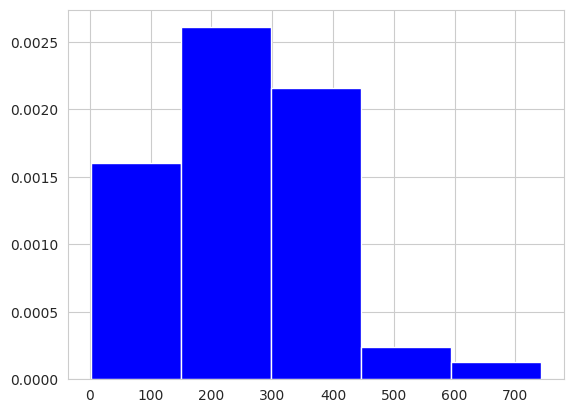

In [111]:
plt.hist(df['step'], bins=5, density=True, alpha=1, color='blue')

In [47]:
df.sample(5)

step      type     amount     nameOrig  oldbalanceOrg  \
378382     17   PAYMENT    7466.27   C779042810           0.00   
4472215   324   CASH_IN  187017.37  C2012309231      149249.00   
4106120   302   PAYMENT    6627.88   C558864848       71128.58   
1759455   161  CASH_OUT  393939.77  C1456018379           0.00   
2941286   230   CASH_IN  461077.13  C1591596469     3957787.71   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
378382             0.00   M456561022            0.00            0.00        0   
4472215       336266.37  C1333177831            0.00            0.00        0   
4106120        64500.70   M830499277            0.00            0.00        0   
1759455            0.00   C269566931      1984258.37      2996592.44        0   
2941286      4418864.84   C784542451      2252816.57      1791739.44        0   

         isFlaggedFraud  
378382                0  
4472215               0  
4106120               0  
1759455               0  
2941286               0

In [48]:
# Print the unique values in the dataset
for c in df.columns:
  print(f'{c}: {df[c].nunique()}')

step: 743
type: 5
amount: 5316900
nameOrig: 6353307
oldbalanceOrg: 1845844
newbalanceOrig: 2682586
nameDest: 2722362
oldbalanceDest: 3614697
newbalanceDest: 3555499
isFraud: 2
isFlaggedFraud: 2


In [49]:
#Missing Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [50]:
#Duplicate Values Check
df.duplicated().sum()

0

In [51]:
# The Already established system is accurate but was only able to identify insignificant number of frauds
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [52]:
# Imbalance dataset wrt fraud/non-fraud
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [53]:
# Transaction having transfer type and amount > 200000
df[df['isFlaggedFraud'] == 1]

step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C2140038573    17316255.05   
6362462   730  TRANSFER   7316255.05  C1869569059    17316255.05   
6362584   741  TRANSFER   5674547.89   C992223106     5674547.89   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2736446      4953893.08   C639921569             0.0             0.0        1   
3247297      1343002.08  C1147517658             0.0             0.0        1   
3760288       536624.41  C1100697970             0.0             0.0        1   
5563713      4892193.09   C891140444             0.0             0.0        1   
5996407     19585040.37  C1392803603             0.0             0.0        1   
5996409     19585040.37  C1109166882             0.0             0.0        1   
6168499      3576297.10   C484597480             0.0             0.0        1   
6205439       353874.22  C1770418982             0.0             0.0        1   
6266413      2542664.27   C661958277             0.0             0.0        1   
6281482     10399045.08  C1806199534             0.0             0.0        1   
6281484     10399045.08  C1909486199             0.0             0.0        1   
6296014      3441041.46  C1082139865             0.0             0.0        1   
6351225      3171085.59  C1308068787             0.0             0.0        1   
6362460     17316255.05  C1395467927             0.0             0.0        1   
6362462     17316255.05  C1861208726             0.0             0.0        1   
6362584      5674547.89  C1366804249             0.0             0.0        1   

         isFlaggedFraud  
2736446               1  
3247297               1  
3760288               1  
5563713               1  
5996407               1  
5996409               1  
6168499               1  
6205439               1  
6266413               1  
6281482               1  
6281484               1  
6296014               1  
6351225               1  
6362460               1  
6362462               1  
6362584               1

In [54]:
## remove rows with merchants
df = df[(df['nameOrig'].str.contains('C') & df['nameDest'].str.contains('C'))]

In [55]:
df.shape

(4211125, 11)

In [61]:
groupdf = newdf.groupby(['nameDest']).agg({'nameDest': 'count'})
customers = groupdf[(groupdf['nameDest']>2)].index
newdf[(newdf['nameDest'].isin(customers))]

step      type       amount     nameOrig  oldbalanceOrg  \
626256     34  CASH_OUT     24866.65   C707202595           0.00   
1598701   156  CASH_OUT    259999.79  C1745487968      199903.00   
1138533   131  CASH_OUT     10966.89   C807259533       41870.00   
1348910   137   CASH_IN    211026.75   C941097126       16477.00   
1022896    47  TRANSFER    695192.27   C760477182           0.00   
2142499   184  CASH_OUT    235286.54  C1127403509           0.00   
1623200   157  TRANSFER   1040761.79   C362895620           0.00   
535323     21  CASH_OUT     58420.41  C1431053701           0.00   
4434204   323   CASH_IN     87604.33   C370483763     1883000.12   
2286977   187  CASH_OUT    164575.16   C357118089           0.00   
223221     14  TRANSFER    825396.65  C1578563895           0.00   
291501     15  CASH_OUT    263519.64  C1578776020           0.00   
733736     37  TRANSFER    255894.45  C1096834795           0.00   
1645306   157  TRANSFER    462129.26  C1988239085       30719.00   
1351837   137  CASH_OUT    358735.14   C136473132           0.00   
60728       9   CASH_IN     20951.33  C1216750329     1482189.10   
1205440   133   CASH_IN     33652.76   C835945029      793300.20   
328620     16  CASH_OUT     35350.99  C1660290407       31565.00   
118713     11   CASH_IN    288458.93  C1224572667       20712.00   
938311     43  CASH_OUT    502742.99   C580854835           0.00   
4120323   302  CASH_OUT    347592.08  C1773681391       54919.00   
5553019   383  TRANSFER   1335129.51   C500923110      153371.54   
2227901   186   CASH_IN     51249.91  C1023120239       32079.00   
46816       9  CASH_OUT    269900.89  C1213665787           0.00   
2012850   180  CASH_OUT    303200.63   C387880750           0.00   
11765       7  TRANSFER    568394.90  C1950391753           0.00   
3991830   298  TRANSFER  12220640.81   C704784860           0.00   
3881787   283  CASH_OUT     47541.87   C707287329        2692.00   
52911       9  CASH_OUT     74028.96  C1692918080           0.00   
722137     37  CASH_OUT    259796.27  C1027676794           0.00   
1332924   137  CASH_OUT     32659.28   C854270080           0.00   
1947411   177  TRANSFER    546886.58   C470142621           0.00   
1396082   139  TRANSFER   3024399.90   C214383636           0.00   
2261007   187  CASH_OUT    255834.52  C1878679479           0.00   
6121177   538   CASH_IN       320.84  C1645939079     7661470.21   
2235723   186  CASH_OUT     24089.32   C819822334           0.00   
2324203   188  CASH_OUT    275811.88   C112337852      648634.90   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
626256             0.00   C395629617      2253150.88      2278017.53        0   
1598701            0.00   C824985636      1038994.77      1298994.56        0   
1138533        30903.11   C681078805      2971522.39      2982489.27        0   
1348910       227503.75  C1116137715      3534652.23      3323625.48        0   
1022896            0.00   C841959247      2523791.18      3218983.45        0   
2142499            0.00   C841959247      4564873.46      4709322.51        0   
1623200            0.00  C1116137715      3395291.90      4436053.69        0   
535323             0.00   C841959247       412827.61       471248.02        0   
4434204      1970604.45  C2143387432       251483.04       163878.71        0   
2286977            0.00  C2143387432       263646.34       428221.50        0   
223221             0.00   C657312979      4134839.60      4960236.25        0   
291501             0.00  C2087563468       802330.73      1065850.38        0   
733736             0.00   C681078805      2782096.90      3037991.35        0   
1645306            0.00   C639249073      3651293.80      4113423.05        0   
1351837            0.00   C824985636       572863.08       931598.22        0   
60728        1503140.43  C1116137715       380959.33        81137.45        0   
1205440       826952.96   C639249073      31018

From above table we can understand that fraud haven't done multiple transactions to cash out money

Outliers

<Axes: xlabel='amount'>

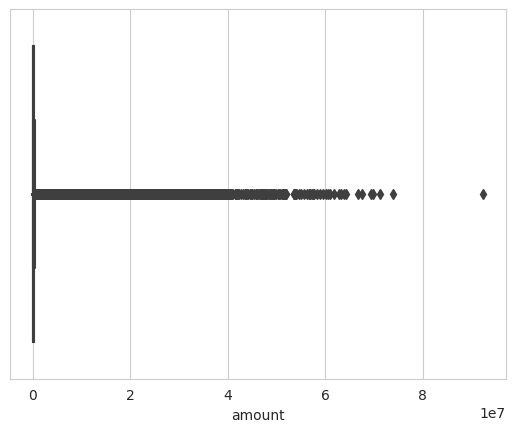

In [98]:
#Box plots
sns.boxplot(x=df['amount'])

In [99]:
q1 = df['amount'].quantile(.25)
q3 = df['amount'].quantile(.75)
iqr =q3 - q1
df[(df['amount'] < q1 - 1.5 * iqr) | (df['amount'] > q1 + 1.5*iqr)]

step      type      amount     nameOrig  oldbalanceOrg  \
84          1  TRANSFER   379856.23  C1449772539           0.00   
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
...       ...       ...         ...          ...            ...   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
84                  0.0  C1590550415       900180.00     19169204.93        0   
85                  0.0   C665576141        29031.00      5515763.34        0   
86                  0.0   C766572210       579285.56            0.00        0   
88                  0.0  C1590550415      1280036.23     19169204.93        0   
89                  0.0  C1590550415      2041543.62     19169204.93        0   
...                 ...          ...             ...             ...      ...   
6362613             0.0  C1240760502       503464.50      1762283.33        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  days  
84                    0     0  
85                    0     0  
86                    0     0  
88                    0     0  
89                    0     0  
...                 ...   ...  
6362613               0    30  
6362616               0    30  
6362617               0    30  
6362618               0    30  
6362619               0    30  

[588473 rows x 12 columns]

**Heatmap**



In [62]:
correlation = df.corr()
correlation['isFraud']

<ipython-input-62-521e450954ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


step              0.039035
amount            0.073082
oldbalanceOrg     0.005389
newbalanceOrig   -0.013400
oldbalanceDest   -0.012167
newbalanceDest   -0.005756
isFraud           1.000000
isFlaggedFraud    0.044095
Name: isFraud, dtype: float64

<Axes: >

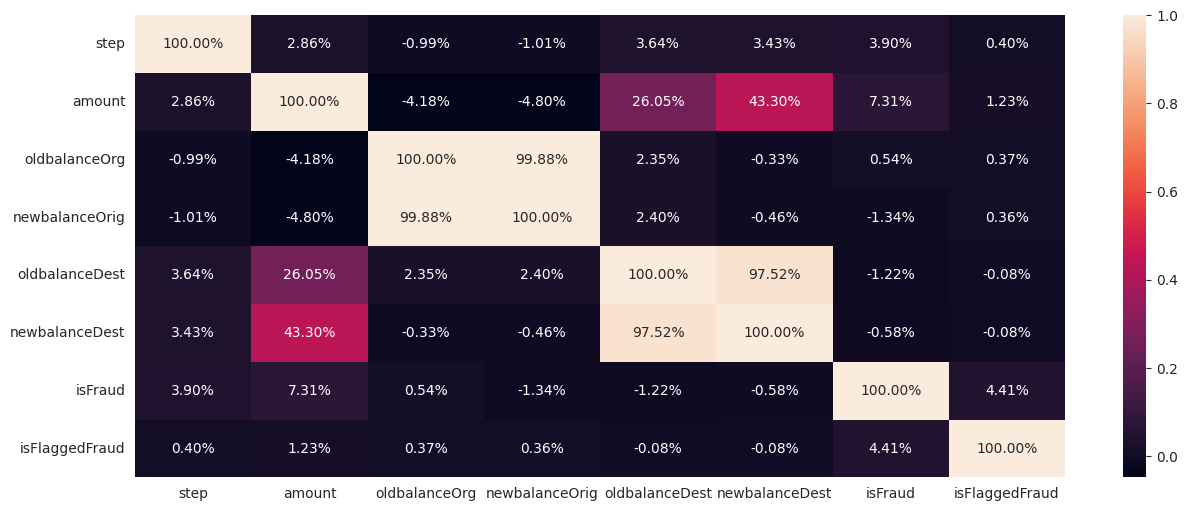

In [63]:
plt.figure(figsize=(15,6))
sns.heatmap(data=correlation, fmt='.2%', annot=True)

In [64]:
df.sample(4)

step      type     amount     nameOrig  oldbalanceOrg  \
1394726   139  CASH_OUT  622782.12  C1244162981            0.0   
4677915   331  CASH_OUT  320921.80  C1492839453       120866.0   
3576307   261  CASH_OUT   11111.46   C424061078        39300.0   
665848     36  CASH_OUT   88024.55  C1057469803       105739.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1394726            0.00  C1475878908      2554155.09      3105412.70        0   
4677915            0.00   C103474204       169820.52       490742.32        0   
3576307        28188.54  C1548963378        44600.84        55712.30        0   
665848         17714.45  C1078584667      4991104.86      5118916.10        0   

         isFlaggedFraud  
1394726               0  
4677915               0  
3576307               0  
665848                0

In [65]:
at = df
at['days'] = at['step'] // 24 # Conversion to days
# at = at.sample(n=400)
at = at.groupby(['days'], as_index=False).agg({'amount': ['min', 'max', 'mean', 'count']})

In [66]:
cols = ['days']
for c in at.columns[1:]:
  cols.append(c[0]+'_'+c[1])
print(cols)

['days', 'amount_min', 'amount_max', 'amount_mean', 'amount_count']


In [67]:
at.columns=cols

<Axes: xlabel='days', ylabel='amount_count'>

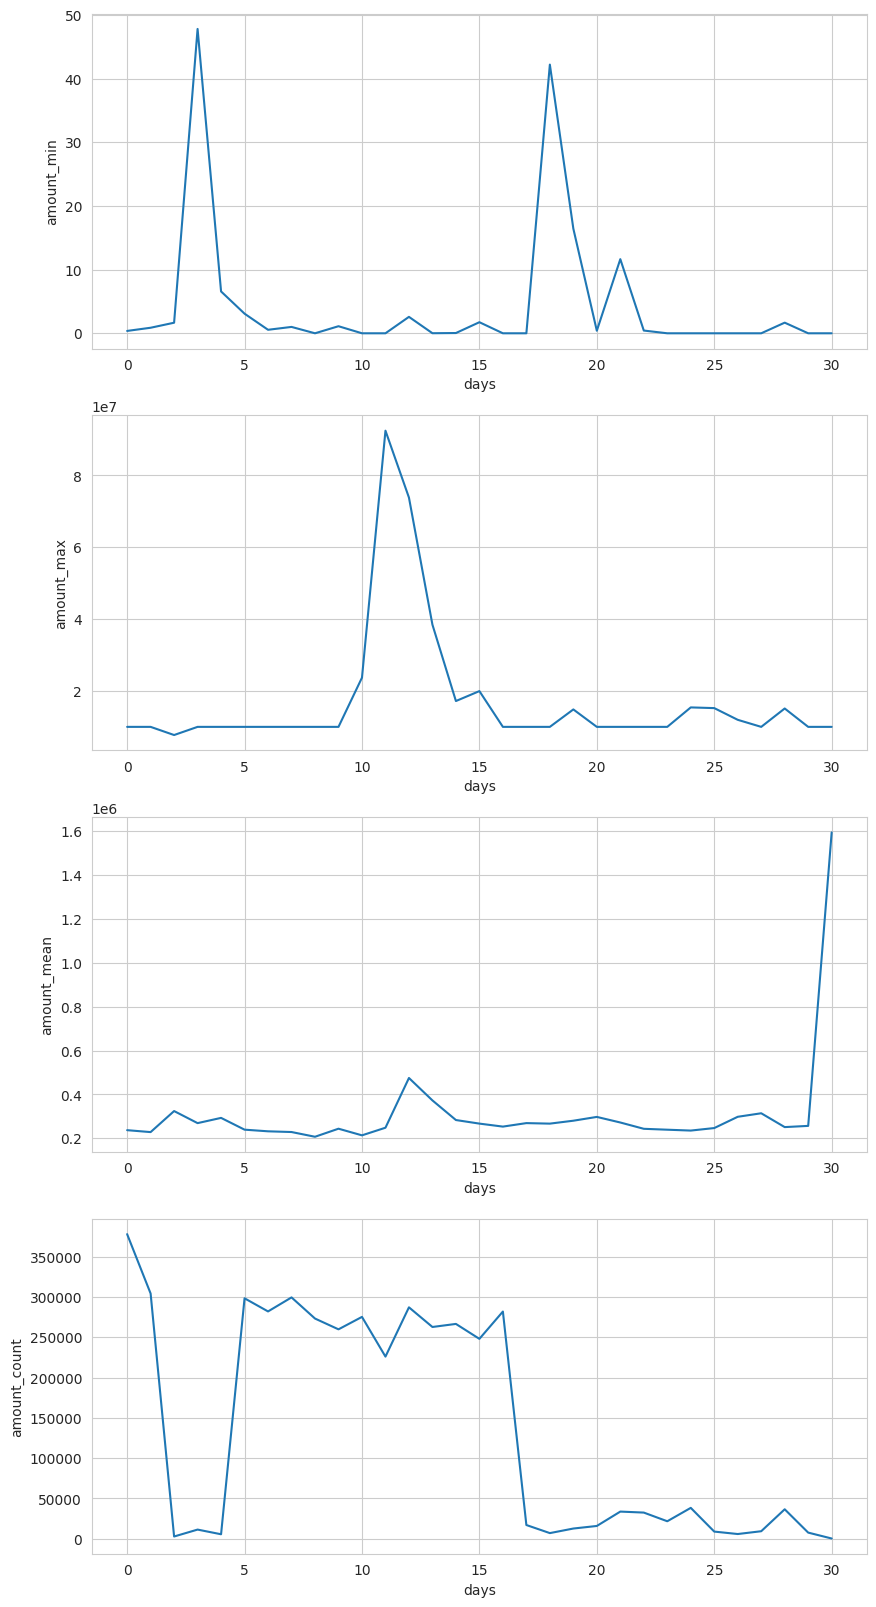

In [68]:
fig, axes = plt.subplots(4,1, figsize=(10,20))
sns.lineplot(data=at, x ='days', y='amount_min', ax=axes[0])
sns.lineplot(data=at, x ='days', y='amount_max', ax=axes[1])
sns.lineplot(data=at, x ='days', y='amount_mean', ax=axes[2])
sns.lineplot(data=at, x ='days', y='amount_count', ax=axes[3])

In [69]:
# There is no fraud occuring in DEBIT transactions
df[(df['type'] == 'DEBIT') & (df['isFraud'] == 1)]

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud, days]
Index: []

In [70]:
df.type.unique()

array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object)

Demostrating the Efficient use of profilereport from pandas profiling

In [102]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
# Undersampling no fraud samples

fraudulent = df[df['isFraud'] == 1]
non_fraudulent = df[df['isFraud'] == 0]

size = fraudulent.shape[0]
non_fraudulent_sampled = non_fraudulent.sample(n=size, random_state=42, axis=0)

balanced_data = pd.concat([fraudulent, non_fraudulent_sampled])

shuffle_df = balanced_data.sample(frac=1, random_state=42)

In [73]:
shuffle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 3115619 to 1431968
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
 11  days            16426 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.6+ MB


**Count Plot for Type**

From Below count plot we can see that fraud only occuring due to payment and cash_out transactions

<Axes: xlabel='count', ylabel='type'>

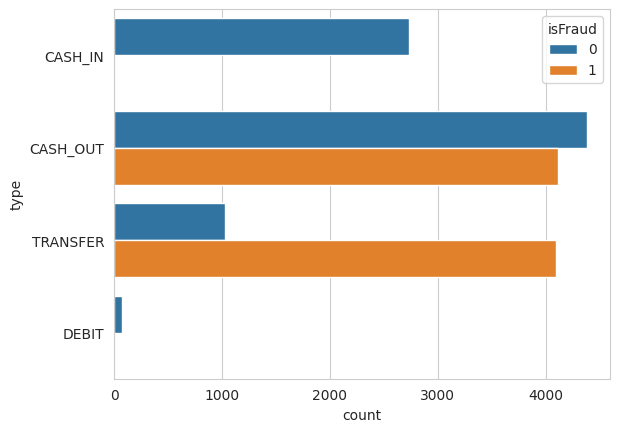

In [74]:
sns.countplot(data=shuffle_df, y='type', hue='isFraud')

In [75]:
sdf = shuffle_df
sdf

step      type      amount     nameOrig  oldbalanceOrg  \
3115619   236   CASH_IN   336679.36   C103450027     7339591.96   
4513834   325  CASH_OUT   128032.58   C506498514           0.00   
1059489    98  CASH_OUT     8055.06  C1544350298        8055.06   
6161404   550  TRANSFER   342309.91   C662184778      342309.91   
6206417   586  CASH_OUT  2581549.92   C648614053     2581549.92   
...       ...       ...         ...          ...            ...   
6302188   683   CASH_IN   100000.60   C430619303      911203.53   
580298     33   CASH_IN   210949.58  C2066845308     2833552.32   
6039793   484  CASH_OUT   156220.74   C389614238      156220.74   
1030533    71  TRANSFER  1871553.73   C677678546     1871553.73   
1431968   139   CASH_IN   359613.65   C244850645     5064301.64   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3115619      7676271.32   C499289357      1483056.10      1146376.74        0   
4513834            0.00  C1872083255      5584607.55      5712640.12        0   
1059489            0.00   C912405348            0.00         8055.06        1   
6161404            0.00  C1740503020            0.00            0.00        1   
6206417            0.00   C213455810            0.00      2581549.92        1   
...                 ...          ...             ...             ...      ...   
6302188      1011204.13   C279319573       853915.71       753915.11        0   
580298       3044501.90  C1827996167      2933894.06      2722944.48        0   
6039793            0.00   C643171110            0.00       156220.74        1   
1030533            0.00   C646623849            0.00            0.00        1   
1431968      5423915.29   C664764228      1573433.03      1213819.38        0   

         isFlaggedFraud  days  
3115619               0     9  
4513834               0    13  
1059489               0     4  
6161404               0    22  
6206417               0    24  
...                 ...   ...  
6302188               0    28  
580298                0     1  
6039793               0    20  
1030533               0     2  
1431968               0     5  

[16426 rows x 12 columns]

In [96]:
shuffle_df[shuffle_df['isFraud'] == 1]

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1059489    98     8055.06        8055.06             0.0            0.00   
6161404   550   342309.91      342309.91             0.0            0.00   
6206417   586  2581549.92     2581549.92             0.0            0.00   
6117047   528   501101.41      501101.41             0.0       561058.61   
3658949   275  2607790.58     2607790.58             0.0      7640097.83   
...       ...         ...            ...             ...             ...   
1511343   149    17569.42       17569.42             0.0       276439.92   
5700981   398    31334.57       31334.57             0.0            0.00   
6183881   567   122816.67      122816.67             0.0            0.00   
6039793   484   156220.74      156220.74             0.0            0.00   
1030533    71  1871553.73     1871553.73             0.0            0.00   

         newbalanceDest  isFraud  isFlaggedFraud  days  type_CASH_IN  \
1059489         8055.06        1               0     4             0   
6161404            0.00        1               0    22             0   
6206417      2581549.92        1               0    24             0   
6117047      1062160.03        1               0    22             0   
3658949     10247888.41        1               0    11             0   
...                 ...      ...             ...   ...           ...   
1511343       294009.34        1               0     6             0   
5700981        31334.57        1               0    16             0   
6183881            0.00        1               0    23             0   
6039793       156220.74        1               0    20             0   
1030533            0.00        1               0     2             0   

         type_CASH_OUT  type_DEBIT  type_TRANSFER  
1059489              1           0              0  
6161404              0           0              1  
6206417              1           0              0  
6117047              1           0              0  
3658949              1           0              0  
...                ...         ...            ...  
1511343              1           0              0  
5700981              1           0              0  
6183881              0           0              1  
6039793              1           0              0  
1030533              0           0              1  

[8213 rows x 13 columns]

In [85]:
# Drop unnecessary columns
shuffle_df.drop(columns=['nameOrig', 'nameDest'], axis=1, inplace=True)
shuffle_df = pd.get_dummies(shuffle_df, columns=['type'])

In [94]:
shuffle_df.shape

(16426, 13)

In [77]:
# Moving isFraud to end
columns = shuffle_df.columns.to_list()

columns.remove('isFraud')
columns.append('isFraud')
shuffle_df = shuffle_df[columns]

In [100]:
q1 = shuffle_df['amount'].quantile(.25)
q3 = shuffle_df['amount'].quantile(.75)
iqr =q3 - q1
shuffle_df[(shuffle_df['amount'] < q1 - 1.5 * iqr) | (shuffle_df['amount'] > q1 + 1.5*iqr)]

step       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
6206417   586   2581549.92     2581549.92            0.00            0.00   
3658949   275   2607790.58     2607790.58            0.00      7640097.83   
6345562   693   1018645.20     1018645.20            0.00            0.00   
4202743   305  10000000.00    12321633.57      2321633.57            0.00   
1847594   163   1299136.58           0.00            0.00      1716621.16   
...       ...          ...            ...             ...             ...   
4919897   350    915672.67      915672.67            0.00       999821.05   
1923443   167   2598276.05     2598276.05            0.00      5368346.27   
6014711   450   9228514.10     9228514.10            0.00            0.00   
1030442    65   3760068.04     3760068.04            0.00       622555.65   
1030533    71   1871553.73     1871553.73            0.00            0.00   

         newbalanceDest  isFraud  isFlaggedFraud  days  type_CASH_IN  \
6206417      2581549.92        1               0    24             0   
3658949     10247888.41        1               0    11             0   
6345562            0.00        1               0    28             0   
4202743            0.00        1               0    12             0   
1847594      3015757.74        0               0     6             0   
...                 ...      ...             ...   ...           ...   
4919897      1915493.72        1               0    14             0   
1923443      7966622.32        1               0     6             0   
6014711            0.00        1               0    18             0   
1030442      4382623.69        1               0     2             0   
1030533            0.00        1               0     2             0   

         type_CASH_OUT  type_DEBIT  type_TRANSFER  
6206417              1           0              0  
3658949              1           0              0  
6345562              0           0              1  
4202743              0           0              1  
1847594              0           0              1  
...                ...         ...            ...  
4919897              1           0              0  
1923443              1           0              0  
6014711              0           0              1  
1030442              1           0              0  
1030533              0           0              1  

[3347 rows x 13 columns]

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

In [87]:
x = shuffle_df.iloc[:, :-1]
y = shuffle_df.iloc[:, -1]

x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

In [88]:
# Import machine learning model
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

In [90]:
boost = GradientBoostingClassifier()

In [91]:
boost.fit(x_train, y_train)

GradientBoostingClassifier()

In [92]:
# Calculate F1 score
f1 = f1_score(y_test, boost.predict(x_test))

# Calculate precision
precision = precision_score(y_test, boost.predict(x_test))

# Calculate recall
recall = recall_score(y_test, boost.predict(x_test))

#Accuracy Score
accuracy = accuracy_score(y_test, boost.predict(x_test))

In [93]:
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print('Accuracy', accuracy)

F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy 1.0
